In [2]:
import numpy as numpy #librería de algebra lineal
import pandas as panda #librería para el procesamiento de datos
#librería para crear gráficas
import plotly.express as plotly #sofisticadas 
import matplotlib.pyplot as matplot #sencillas
import re #librería para hacer uso de expresiones regulares

import os #se importan los datasets con los que se trabajaran
for dirname, _, filenames in os.walk('C:/Users/Valeria/Documents/9no Semestre/Analítica de Big Data/Proyecto Final/Breastfeeding/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Valeria/Documents/9no Semestre/Analítica de Big Data/Proyecto Final/Breastfeeding/Breastfeeding_3months.xlsx
C:/Users/Valeria/Documents/9no Semestre/Analítica de Big Data/Proyecto Final/Breastfeeding/Breastfeeding_3months_.csv
C:/Users/Valeria/Documents/9no Semestre/Analítica de Big Data/Proyecto Final/Breastfeeding/FormulaMilk_3months.xlsx
C:/Users/Valeria/Documents/9no Semestre/Analítica de Big Data/Proyecto Final/Breastfeeding/FormulaMilk_3months_.csv


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Se realiza la lectura del archivo que se analizará
dataset = panda.read_csv('C:/Users/Valeria/Documents/9no Semestre/Analítica de Big Data/Proyecto Final/Breastfeeding/FormulaMilk_3months_.csv')

In [5]:
dataset.head() #Se muestra una parte de la información

,status_id,created_at,text,display_text_width,country,day
0,1.538674e+18,2022-06-20 00:02:41 UTC,I have 67 days worth of milk stocked up for my...,267.0,NaN,Monday
1,1.538675e+18,2022-06-20 00:07:19 UTC,Free Day &amp; Night Toddler Milk Samples - HA...,267.0,NaN,Monday
2,1.538676e+18,2022-06-20 00:12:58 UTC,I need help with formula milk &amp; diapers. W...,144.0,NaN,Monday
3,1.538677e+18,2022-06-20 00:14:12 UTC,Bill Gates is amazing.\nHe launches his brand ...,139.0,NaN,Monday
4,1.538677e+18,2022-06-20 00:16:21 UTC,🛎️ IN STOCK ALERT 🛎️\n\nSimilac 22.8 oz. Milk-...,208.0,NaN,Monday


In [6]:
dataset.info() #Devuelve la información de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43559 entries, 0 to 43558
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status_id           41205 non-null  float64
 1   created_at          41205 non-null  object 
 2   text                38195 non-null  object 
 3   display_text_width  41205 non-null  float64
 4   country             71 non-null     object 
 5   day                 41205 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.0+ MB


In [7]:
dataset.isna().sum() #Busca las columnas que tengan valores nulos

status_id              2354
created_at             2354
text                   5364
display_text_width     2354
country               43488
day                    2354
dtype: int64

In [8]:
#Devuelve el tipo de objeto en la columna 'created_at'
type(dataset.at[0, 'created_at'])
#El valor que devuelve es str

str

In [9]:
dataset['created_at'] = panda.to_datetime(dataset['created_at']) #Cambia de string datetime a datetime

In [10]:
dataset['created_at'].head() #Muestra las primeras fechas en formato string datetime

0   2022-06-20 00:02:41+00:00
1   2022-06-20 00:07:19+00:00
2   2022-06-20 00:12:58+00:00
3   2022-06-20 00:14:12+00:00
4   2022-06-20 00:16:21+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [11]:
dataset['country'].unique()

array([nan, 'United States', 'Australia', 'United Kingdom', 'Canada',
       'Republic of the Philippines', 'Botswana', 'Zimbabwe', 'Ghana',
       'Mexico', 'Pakistan', 'South Africa', 'Nigeria', 'Ireland'],
      dtype=object)

In [12]:
#pip install pycountry

In [13]:
import pycountry
mapeo = {country.name: country.alpha_3 for country in pycountry.countries} #alpha_3 cambia el nombre del país por sus 3 siglas
mapeo_banderas = {country.name: country.flag for country in pycountry.countries} #Obtiene las banderas de los países

In [14]:
#Se renombran los nombres de los países a los cuales no se pueden obtener su código
dataset['country'].replace(['Republic of the Philippines'], 
['Philippines'],regex = True, inplace = True)
#regex permite expresiones regulates e inplace permite aplicar los cambios directamente al dataset

In [15]:
dataset = dataset.assign(country_code = None) #Se agrega la columna country_code
dataset = dataset.assign(country_flag = None) #Se agrega la columna country_flag
for index in dataset.index:   #Realiza recorrido por filas del dataset
    country = dataset.at[index, 'country']  #country es igual al elemento en index de la columna country
    dataset.at[index, 'country_code'] = mapeo.get(country) #Se coloca en el dataset las siglas del país
    dataset.at[index, 'country_flag'] = mapeo_banderas.get(country) #Se coloca en el dataset las banderas

In [16]:
dataset['country_code'].unique() #Obtiene de la columna country_code los elementos no repetidos, siendo 45 países

array([None, 'USA', 'AUS', 'GBR', 'CAN', 'PHL', 'BWA', 'ZWE', 'GHA',
       'MEX', 'PAK', 'ZAF', 'NGA', 'IRL'], dtype=object)

In [17]:
dataset['country_flag'].unique() #Obtiene de la columna country_code los elementos no repetidos, siendo 45 países

array([None, '🇺🇸', '🇦🇺', '🇬🇧', '🇨🇦', '🇵🇭', '🇧🇼', '🇿🇼', '🇬🇭', '🇲🇽', '🇵🇰',
       '🇿🇦', '🇳🇬', '🇮🇪'], dtype=object)

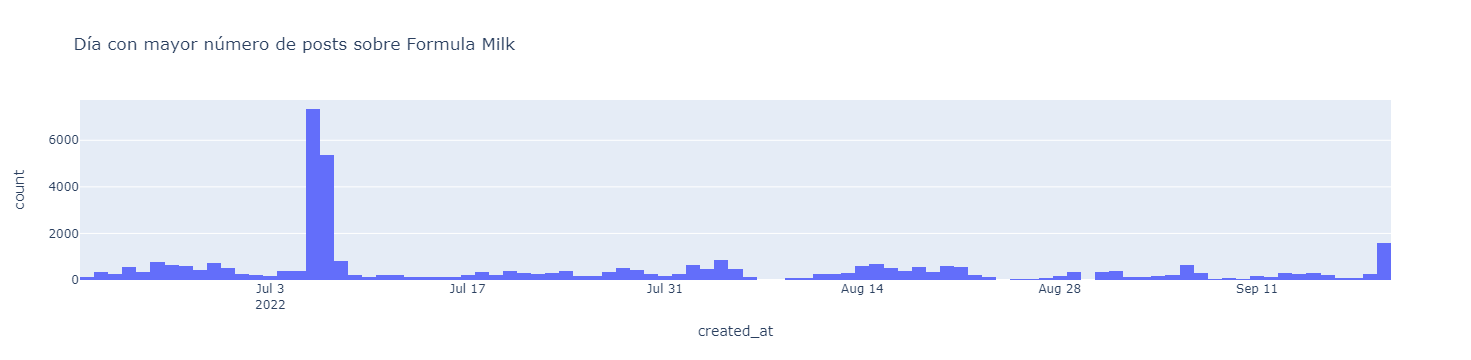

In [40]:
figura = plotly.histogram(dataset, x = 'created_at', title='Día con mayor número de posts sobre Formula Milk')
figura.show()

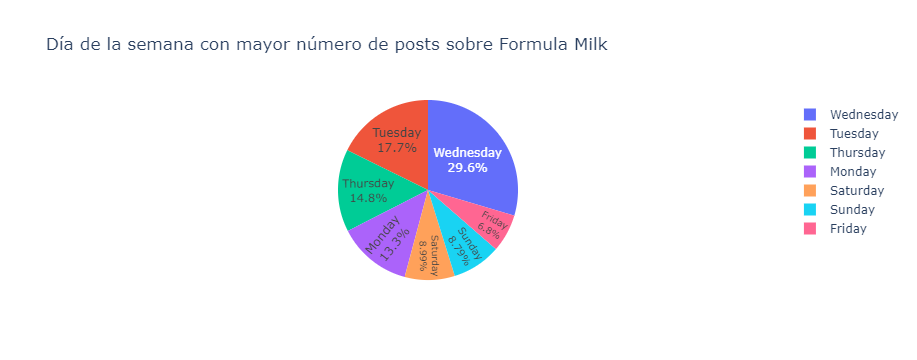

In [41]:
pie = dataset.groupby(['day']).size().reset_index(name = 'size')
pie.sort_values(by='size', ascending=False ,inplace=True)
figura = plotly.pie(pie, values='size', names='day',
             title='Día de la semana con mayor número de posts sobre Formula Milk',
             hover_data=['size'])
figura.update_traces(textposition='inside', textinfo='percent+label')
figura.show()

In [34]:
dtMundial = dataset.groupby(['country', 'country_code', 'country_flag']).size().reset_index(name = 'size')
dtMundial.sort_values(by='size', ascending=False ,inplace=True)

In [35]:
dtMundial.head()

,country,country_code,country_flag,size
11,United States,USA,🇺🇸,42
10,United Kingdom,GBR,🇬🇧,10
3,Ghana,GHA,🇬🇭,5
8,Philippines,PHL,🇵🇭,4
0,Australia,AUS,🇦🇺,2


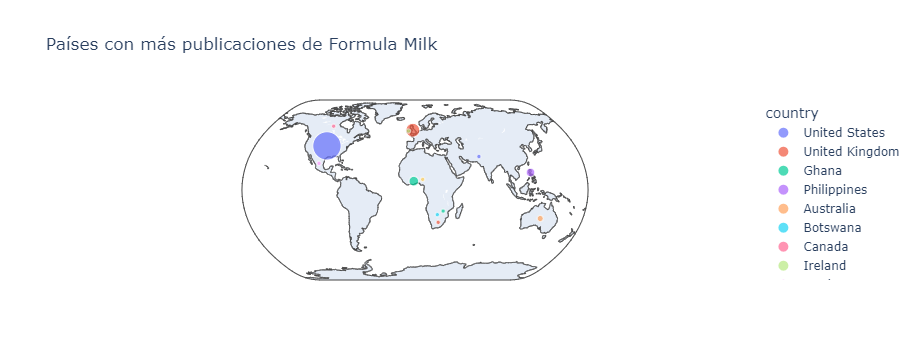

In [37]:
figura = plotly.scatter_geo(dtMundial, locations="country_code", color="country",
                     hover_name="country", size="size",
                     projection="natural earth1", title="Países con más publicaciones de Formula Milk")
figura.show()

In [25]:
dt=dataset.groupby([dataset['created_at'].dt.hour])['status_id'].count()
print(dt)

created_at
0.0     1437
1.0     1452
2.0     1407
3.0     1345
4.0     1322
5.0     1158
6.0     1284
7.0     1330
8.0     1235
9.0     1332
10.0    1272
11.0    1594
12.0    1697
13.0    1833
14.0    2001
15.0    2161
16.0    2135
17.0    2009
18.0    1825
19.0    1925
20.0    3288
21.0    2404
22.0    2054
23.0    1705
Name: status_id, dtype: int64


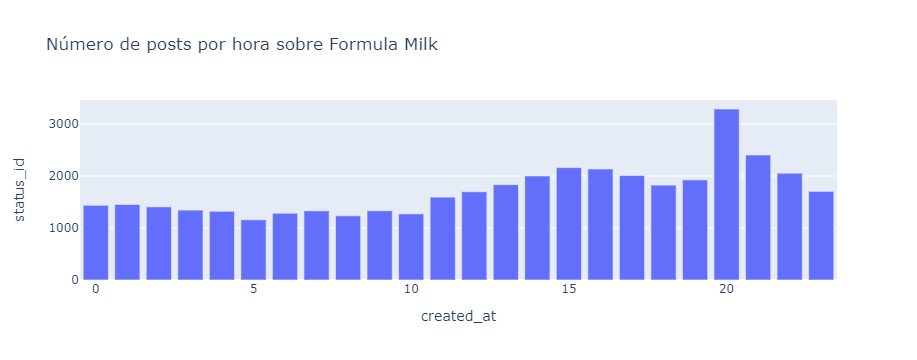

In [39]:
figura = plotly.bar(dt, y='status_id', title="Número de posts por hora sobre Formula Milk")
figura.show()